This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [3]:
yaml_file = '../events/belize_fire_south_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'belize_fire_south_2024',
 'bounds': [-71.53071089, -33.20143816, -71.2964628, -32.98270579],
 'event_date': '2024-05-16',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [18, 156],
 'mgrs_tiles': ['19HBD'],
 'source_id': 'EMSR726 AOI2 AOI4',
 'dist_hls_confirmed_change_min_days': 30,
 'links': ['https://rapidmapping.emergency.copernicus.eu/EMSR726/reporting',
  'https://rapidmapping.emergency.copernicus.eu/EMSR726/',
  'https://reliefweb.int/disaster/wf-2024-000090-blz']}

In [4]:
df_0 = gpd.read_file('../external_validation_data/copernicus_ems/south_belize_fire_2024/EMSR726_AOI02_GRA_PRODUCT_v1/EMSR726_AOI02_GRA_PRODUCT_observedEventA_v1.shp')
df_0.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,4,2.528498,"POLYGON ((-88.90423 16.20197, -88.90464 16.201..."
1,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,4,0.967956,"POLYGON ((-88.90960 16.20425, -88.90990 16.203..."
2,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,4,11.039403,"POLYGON ((-88.96322 16.20490, -88.96276 16.204..."
3,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,4,3.118389,"POLYGON ((-88.91334 16.20531, -88.91298 16.205..."
4,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,4,2.502646,"POLYGON ((-88.98014 16.20372, -88.98044 16.203..."


In [5]:
df_1 = gpd.read_file('../external_validation_data/copernicus_ems/south_belize_fire_2024/EMSR726_AOI04_GRA_PRODUCT_v2/EMSR726_AOI04_GRA_PRODUCT_observedEventA_v2.shp')
df_1.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,3,0.603745,"POLYGON ((-89.17028 16.02421, -89.17064 16.024..."
1,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,3,4.246278,"POLYGON ((-89.16675 16.02537, -89.16635 16.024..."
2,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,3,1.176296,"POLYGON ((-89.17185 16.02628, -89.17214 16.026..."
3,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,3,4.095714,"POLYGON ((-89.14315 16.02725, -89.14407 16.026..."
4,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,3,43.187997,"POLYGON ((-89.18891 16.02969, -89.18858 16.029..."


<Axes: >

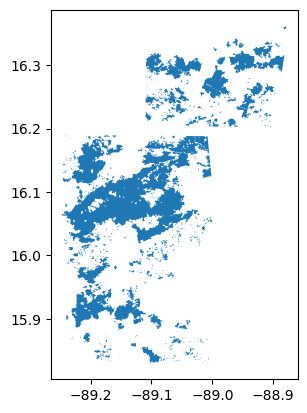

In [6]:
df_event = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
df_event.plot()

In [8]:
df_event.total_bounds

array([-89.24701432,  15.83098781, -88.87813401,  16.36103372])

In [9]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,belize_fire_south_2024,2024-05-16,Copernicus EMSR726 AOI2 AOI4,"MULTIPOLYGON (((-89.21650 15.86288, -89.21653 ..."


In [10]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [11]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

<Axes: >

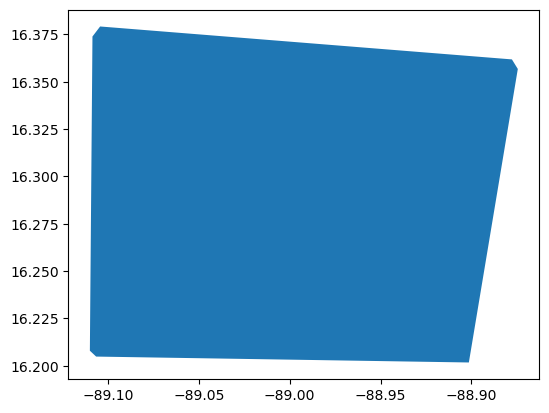

In [13]:
df_aoi_0 = gpd.read_file('../external_validation_data/copernicus_ems/south_belize_fire_2024/EMSR726_AOI02_GRA_PRODUCT_v1/EMSR726_AOI02_GRA_PRODUCT_areaOfInterestA_v1.shp')
df_aoi_0.plot()

<Axes: >

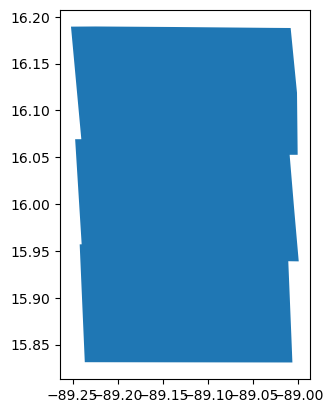

In [14]:
df_aoi_1 = gpd.read_file('../external_validation_data/copernicus_ems/south_belize_fire_2024/EMSR726_AOI04_GRA_PRODUCT_v2/EMSR726_AOI04_GRA_PRODUCT_areaOfInterestA_v2.shp')
df_aoi_1.plot()

In [15]:
df_aoi = pd.concat([df_aoi_0, df_aoi_1], axis=0).reset_index(drop=True)

<Axes: >

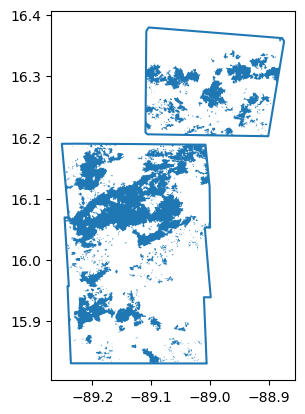

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event_f.plot(ax=ax)

In [17]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')